## Lab 6 - Task 7 - Clustering countries' economic data


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.cluster import DBSCAN 
from sklearn import cluster, datasets, metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize 


In [91]:
# Importing and exploring data
country_df = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv') 
country_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


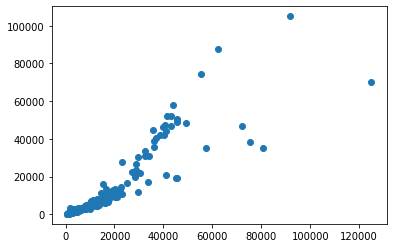

In [92]:
# ploting two important dimensions of the data, the income level and the GDP per person. 
plt.scatter(country_df['income'], country_df['gdpp'])
plt.show()

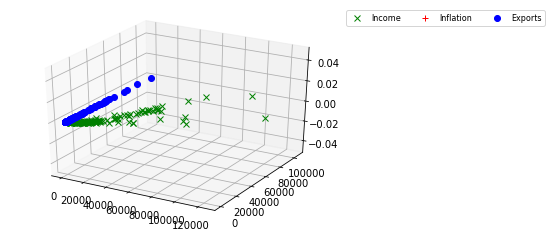

In [93]:
# 3d visualization on the Income, Inflation, and Exports dimensions
from mpl_toolkits.mplot3d import Axes3D

ax = plt.subplot(111, projection='3d')

ax.plot(country_df['income'], country_df['gdpp'], 'x', color='g', label='Income')
ax.plot(country_df['inflation'], country_df['gdpp'], '+', color='r', label='Inflation')
ax.plot(country_df['exports'], country_df['gdpp'], 'o', color='b', label='Exports')
plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(1, 1))

plt.show()

In [94]:
# impoting and exploring the dictionary that explains the data
dictionary_df = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/data-dictionary.csv')
dictionary_df

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [95]:
# removing the country name, preparing the data for training by keeping the numerical values only.
X = country_df.iloc[:,1:]
X

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


## K-Means

In [96]:
# Training K-Means algorithm with 3 clusters
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X)
k_means.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [97]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, k_means.labels_))

Silhouette Coefficient: 0.700


In [98]:
# Grouping the predicted values per class. The majority have been classified as under-developed.
print("Number of samples per class as predicted by the K-Means algorithm:")
k_predictions = k_means.labels_
pred_series = pd.DataFrame(k_predictions)
print(pred_series.value_counts())

Number of samples per class as predicted by the K-Means algorithm:
0    128
1     32
2      7
dtype: int64


In [99]:
# Attaching the predicted values column to the data frame.

pred_df = country_df.copy()

pred_df['Categories'] = k_means.labels_ 

pred_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Categories
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [100]:
pred_df.set_index("country", inplace=True)

In [104]:
# Eploring the predicted categories of some countries.
pred_df.loc[['Iraq', 'India', 'Norway', 'Germany']]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Categories
country,,,,,,,,,,
Iraq,36.9,39.4,8.41,34.1,12700,16.600,67.2,4.56,4500,0
India,58.8,22.6,4.05,27.1,4410,8.980,66.2,2.60,1350,0
Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800,2
Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,1


In [113]:
# Checking the countries with the developed predicted category. There are 7 countries according the model.
pred_df.loc[pred_df['Categories'] == 2]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Categories
country,,,,,,,,,,
Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,2
Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,2
Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,2
Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800,2
Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300,2
Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,2
Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600,2


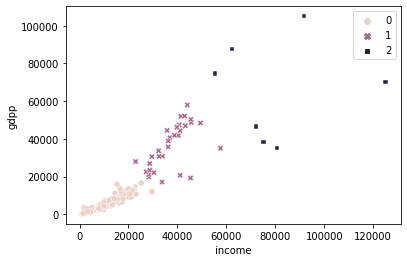

In [101]:
# Visualizing using Seaborn
sns.scatterplot(
    data=pred_df, x='income', y='gdpp',
    hue=k_means.labels_ , style=k_means.labels_)

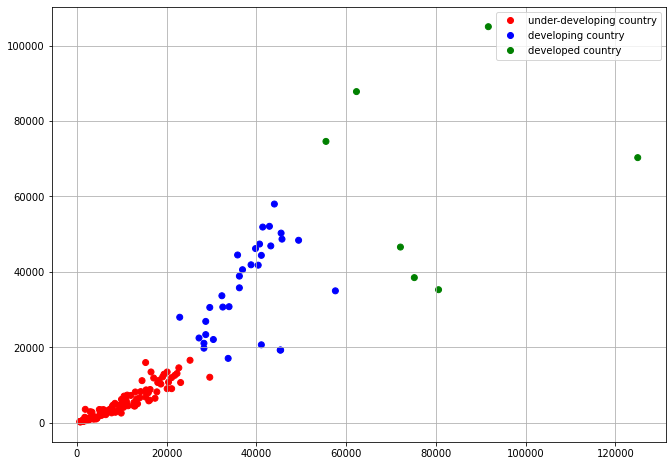

In [102]:
# Visualizing using matplotlib
from matplotlib.colors import ListedColormap
classes = ['under-developing country', 'developing country', 'developed country']
values = [0, 1, 2]
colours = ListedColormap(['r','b','g'])
plt.figure(figsize=(11,8))

scatter = plt.scatter(x=pred_df['income'], y=pred_df['gdpp'], c=k_means.labels_, cmap=colours)
plt.grid(True)

plt.legend(handles=scatter.legend_elements()[0], labels=classes)

plt.show()

## DBSCAN Algorithm

In [115]:
X

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [125]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
X_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [126]:
# Normalizing the data so that the data approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 
X_normalized

,0,1,2,3,4,5,6,7,8
0,0.399908,-0.352455,0.086416,-0.025531,-0.250264,0.048717,-0.501333,0.589205,-0.210300
1,-0.365985,-0.325723,-0.065881,0.048103,-0.254902,-0.212106,0.439948,-0.583983,-0.329773
2,-0.163969,-0.059571,-0.580597,-0.385691,-0.132725,0.474344,0.402916,-0.023081,-0.279685
3,0.514838,0.198822,-0.371311,-0.042390,-0.150016,0.355665,-0.302377,0.545696,-0.132380
4,-0.491459,0.113510,-0.202688,0.351527,0.071873,-0.425130,0.497552,-0.382880,-0.029543
...,...,...,...,...,...,...,...,...,...
162,-0.144995,0.129143,-0.367478,0.154715,-0.474702,-0.314817,-0.547742,0.235095,-0.351539
163,-0.131920,-0.115596,-0.174351,-0.304047,-0.008404,0.906219,0.136893,-0.079345,0.007347
164,-0.169087,0.513329,0.004032,0.626742,-0.299015,0.186080,0.130322,-0.300287,-0.289637
165,0.191119,-0.173244,-0.254562,-0.220551,-0.280838,0.639702,-0.146885,0.486279,-0.271816


In [127]:
# Step 4: Reducing the dimensionality of the data to make it visualizable

pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
X_principal

,P1,P2
0,0.931544,-0.052894
1,-0.431395,-0.144087
2,0.133125,-0.373318
3,0.876380,0.190816
4,-0.725008,0.325375
...,...,...
162,0.581214,0.472084
163,0.109780,-0.449313
164,-0.191270,0.771986
165,0.816545,-0.233148


In [181]:
# Step 5: Building the clustering model

# Numpy array of all the cluster labels assigned to each data point 
db_default = DBSCAN(eps = 0.04, min_samples = 4).fit(X_principal) 
labels = db_default.labels_ 
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1,  0,  1, -1, -1,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  0])

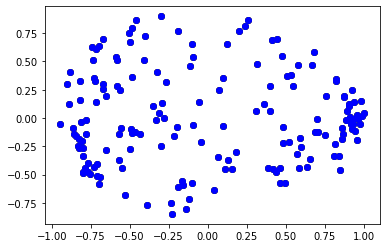

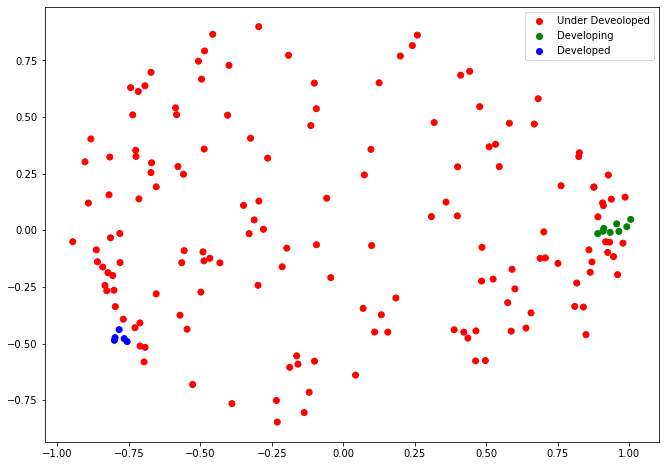

In [185]:
#Step 6: Visualizing the clustering

# Building the label to colour mapping 
colours = {} 
colours[-1] = 'r'
colours[0] = 'g'
colours[1] = 'b'

  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
  
# For the construction of the legend of the plot 
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r'); 
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g'); 
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 

  
# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(11, 8)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
  
# Building the legend 
plt.legend((r, g, b), ('Under Deveoloped', 'Developing', 'Developed')) 
  
plt.show() 
